In [1]:
import pandas as pd
import numpy as np
import os
import glob

In [43]:
# Columnas del df
columnas = ['ID_nodo', 'Fecha_y_hora', 'Consumo', 'Calidad_dato', 'Numero_muestras', 'Nombre_del_interruptor']
# Directorio donde se encuentran los archivos CSV
carpeta = r'C:\Users\junit\OneDrive\Escritorio\7mo semestre\Machin learning\proyecto_modulo1\Datos consumo'
# Obtener la lista de archivos CSV en el directorio especificado
archivos_csv = glob.glob(os.path.join(carpeta, '*.csv'))

tamano_parte = 1000
chunks = []
# Inicializar un DataFrame vacío donde se combinarán los resultados
df_combinado = pd.DataFrame()

# Leer los archivos CSV en partes y procesarlos
for archivo in archivos_csv:
    iter_csv = pd.read_csv(archivo, names=columnas, header=None, chunksize=tamano_parte, sep=';')
    for chunk in iter_csv:
        chunks.append(chunk)
df_combinado = pd.concat(chunks, ignore_index=True)

In [5]:
df_combinado.head()

,ID_nodo,Fecha_y_hora,Consumo,Calidad_dato,Numero_muestras,Nombre_del_interruptor
0,177760211,2022-03-01 03:00:00+00:00,-8.458754,1,4,AJAHUEL 110 H1 P
1,395102211,2022-03-01 03:00:00+00:00,-168.352138,1,4,BUIN 110 HT1 MTP
2,395684211,2022-03-01 03:00:00+00:00,93.961443,1,4,BUIN 110 H2 P
3,397670211,2022-03-01 03:00:00+00:00,27.799431,1,4,LOSALME 110 H1 P
4,397693211,2022-03-01 03:00:00+00:00,55.301902,1,4,LOSALME 110 H3 P


In [44]:
df_combinado['Fecha_y_hora'] = pd.to_datetime(df_combinado['Fecha_y_hora'], format = "%Y-%m-%d %H:%M:%S%z",utc=True)

In [5]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 6 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   ID_nodo                 int64              
 1   Fecha_y_hora            datetime64[ns, UTC]
 2   Consumo                 float64            
 3   Calidad_dato            int64              
 4   Numero_muestras         int64              
 5   Nombre_del_interruptor  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(1)
memory usage: 102.7+ MB


In [45]:
df_combinado['Subestacion'] = df_combinado['Nombre_del_interruptor'].str.split(' ').str[0]

In [7]:
df_combinado["Dia"] = df_combinado["Fecha_y_hora"].dt.day
df_combinado["Mes"] = df_combinado["Fecha_y_hora"].dt.month
df_combinado["Año"] = df_combinado["Fecha_y_hora"].dt.year
df_combinado["Hora"] = df_combinado["Fecha_y_hora"].dt.hour

In [46]:
df_combinado.drop(columns=['Nombre_del_interruptor'], inplace=True)

In [50]:
df_agrupado = df_combinado.groupby(["Fecha_y_hora", "Subestacion"])["Consumo"].mean().reset_index()

In [51]:
df_agrupado

,Fecha_y_hora,Subestacion,Consumo
0,2017-02-28 18:00:00+00:00,AJAHUEL,44.926327
1,2017-02-28 18:00:00+00:00,BUIN,-0.238878
2,2017-02-28 18:00:00+00:00,CHENA,48.225335
3,2017-02-28 18:00:00+00:00,CNAVIA,43.987126
4,2017-02-28 18:00:00+00:00,ELSALTO,146.727841
...,...,...,...
387116,2023-06-28 03:00:00+00:00,CHENA,53.363735
387117,2023-06-28 03:00:00+00:00,CNAVIA,47.266128
387118,2023-06-28 03:00:00+00:00,ELSALTO,119.453638
387119,2023-06-28 03:00:00+00:00,FLORIDA,-1.497396


In [54]:
train=df_agrupado.query("Fecha_y_hora.dt.year>2017 and Fecha_y_hora.dt.year<2022")

In [55]:
test=df_agrupado.query("Fecha_y_hora.dt.year==2022")

In [56]:
df_agrupado.isnull().sum()

Fecha_y_hora    0
Subestacion     0
Consumo         0
dtype: int64

In [57]:
test.head()

,Fecha_y_hora,Subestacion,Consumo
295869,2022-01-01 00:00:00+00:00,AJAHUEL,33.141337
295870,2022-01-01 00:00:00+00:00,BUIN,-0.207638
295871,2022-01-01 00:00:00+00:00,CHENA,38.139376
295872,2022-01-01 00:00:00+00:00,CNAVIA,42.789998
295873,2022-01-01 00:00:00+00:00,ELSALTO,102.279390


In [58]:
test["Subestacion"].unique()

array(['AJAHUEL', 'BUIN', 'CHENA', 'CNAVIA', 'ELSALTO', 'FLORIDA',
       'LOSALME'], dtype=object)

In [59]:
Y = train.loc[train["Subestacion"] == "AJAHUEL"]
y=Y["Consumo"].to_numpy()
T= test.loc[test["Subestacion"] == "AJAHUEL"]
t=T["Consumo"].to_numpy()

In [60]:
Y

,Fecha_y_hora,Subestacion,Consumo
51450,2018-01-01 00:00:00+00:00,AJAHUEL,34.323375
51457,2018-01-01 01:00:00+00:00,AJAHUEL,41.342831
51464,2018-01-01 02:00:00+00:00,AJAHUEL,39.269293
51471,2018-01-01 03:00:00+00:00,AJAHUEL,34.332710
51478,2018-01-01 04:00:00+00:00,AJAHUEL,31.011387
...,...,...,...
295834,2021-12-31 19:00:00+00:00,AJAHUEL,39.961101
295841,2021-12-31 20:00:00+00:00,AJAHUEL,40.491502
295848,2021-12-31 21:00:00+00:00,AJAHUEL,41.085095
295855,2021-12-31 22:00:00+00:00,AJAHUEL,39.438356


In [61]:
y

array([34.32337525, 41.34283125, 39.26929325, ..., 41.08509475,
       39.438356  , 33.24945275])

In [62]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [63]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34917 entries, 51450 to 295862
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Fecha_y_hora  34917 non-null  datetime64[ns, UTC]
 1   Subestacion   34917 non-null  object             
 2   Consumo       34917 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 1.1+ MB


In [64]:
T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 295869 to 357182
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Fecha_y_hora  8760 non-null   datetime64[ns, UTC]
 1   Subestacion   8760 non-null   object             
 2   Consumo       8760 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 273.8+ KB


In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

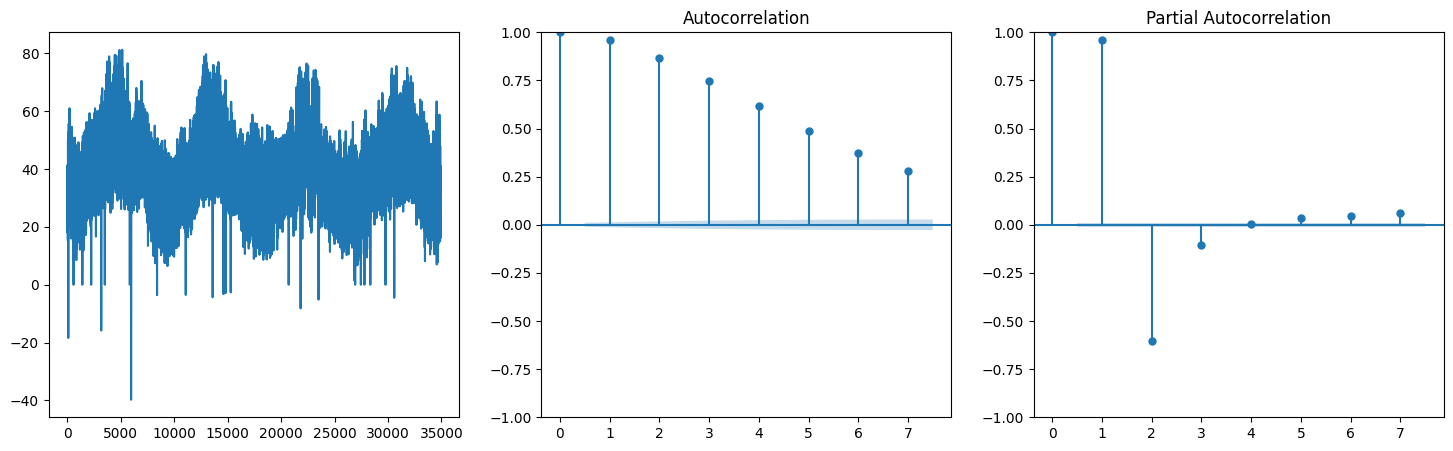

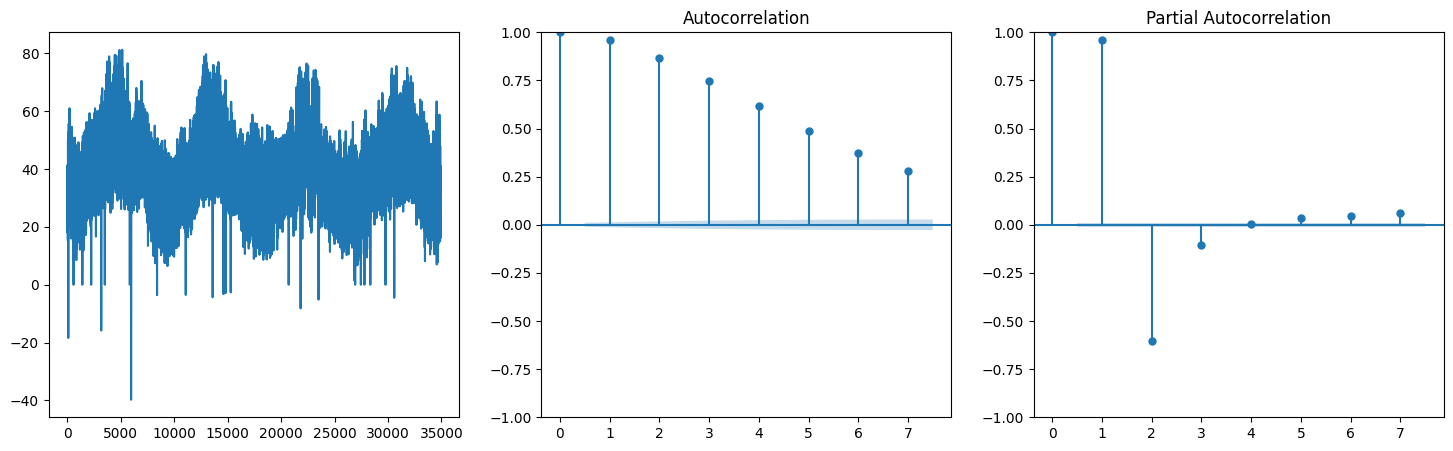

In [65]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(18, 5)
axes[0].plot([i for i in range(len(y))],y)
plot_acf(y,ax=axes[1],lags=7)
plot_pacf(y,method="ywm",lags=7,ax=axes[2])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

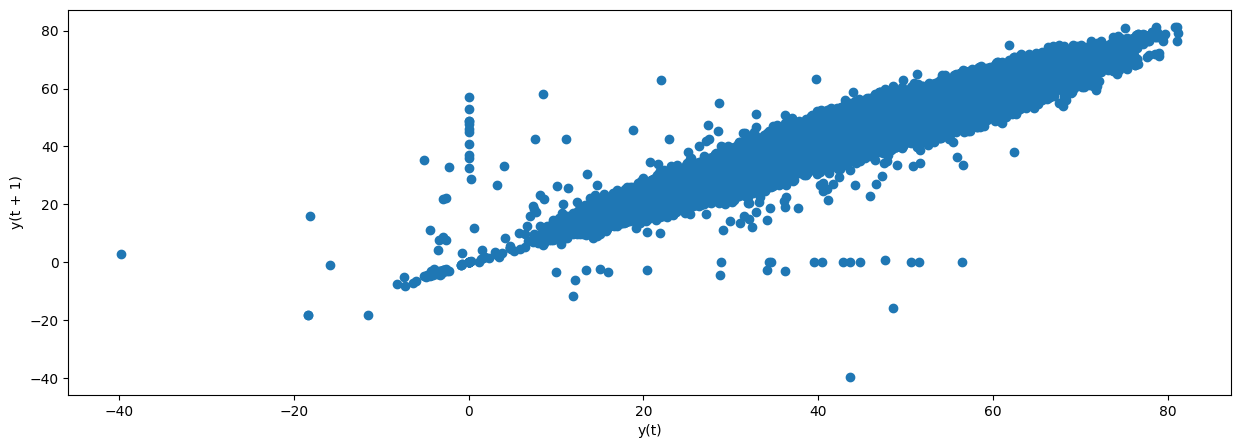

In [66]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 5)
pd.plotting.lag_plot(Y["Consumo"], lag=1,ax=axes)

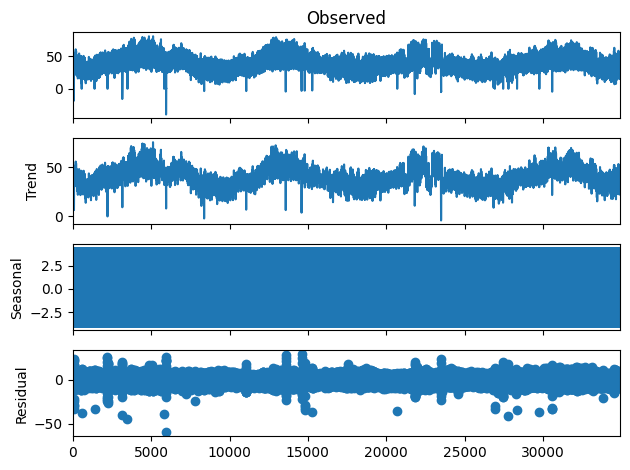

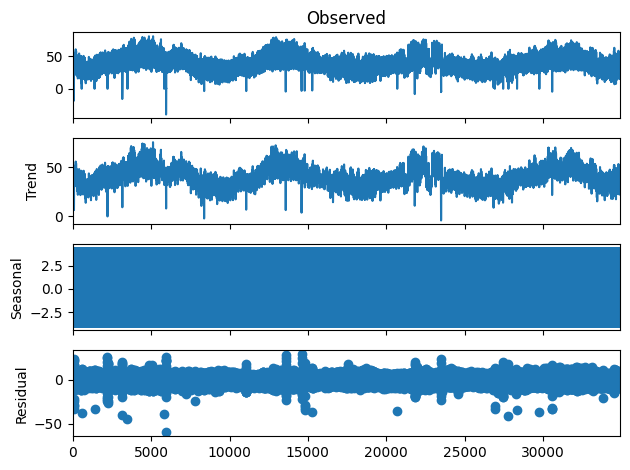

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(y,model="additive",period=12)
result.plot()

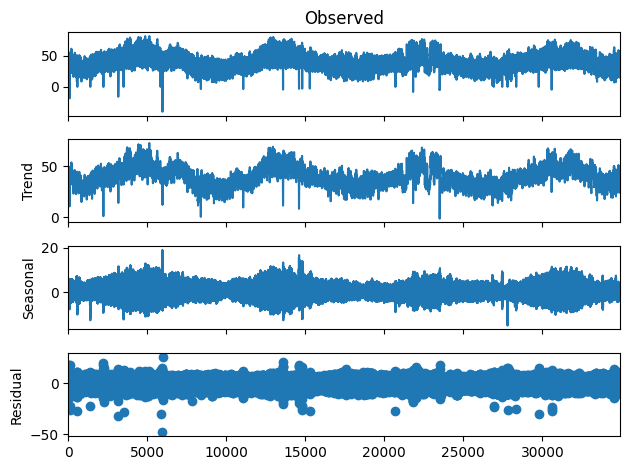

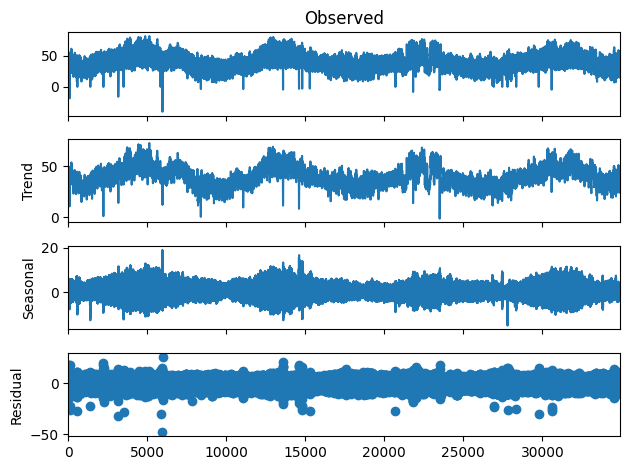

In [68]:
from statsmodels.tsa.seasonal import STL

stl = STL(y,period=12)
res_new = stl.fit()
res_new.plot()

In [69]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y,maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -54.644101
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [70]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.317628
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [71]:
from pmdarima.arima import CHTest
from pmdarima.arima import nsdiffs

CHTest(m=12).estimate_seasonal_differencing_term(y)

1

In [72]:
x=[i for i in range(1,len(y)+1)]

In [73]:
xf=[i for i in range(len(y)+1,len(y)+len(t)+1)]

In [74]:
y.shape

(34917,)

C:\Users\junit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\junit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE 9.393621673183045
AIC 177322.24399223356


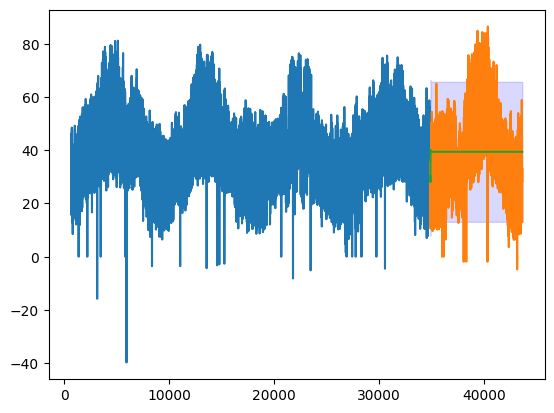

In [76]:
modelo1=ARIMA(y,order=(5,0,2))
m1=modelo1.fit()
m1_p = m1.get_forecast(steps=len(t))
m1_ci = m1_p.conf_int(0.05)
plt.plot(x[700:],y[700:],xf,t,xf,m1_p.predicted_mean)
plt.fill_between(xf, m1_ci[:,0], m1_ci[:,1], color='b', alpha=.15)
print("MSE",m1.mse)
print("AIC",m1.aic)

Este es que si por los valores de Q y P

MSE 11.097305860646758
AIC 183133.00913685016


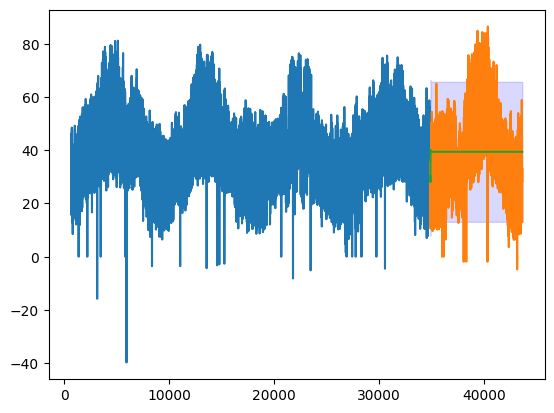

In [77]:
modelo2=ARIMA(y,order=(1,0,1))
m2=modelo2.fit()
m2_p = m2.get_forecast(steps=len(t))
m2_ci = m2_p.conf_int(0.05)
plt.plot(x[700:],y[700:],xf,t,xf,m1_p.predicted_mean)
plt.fill_between(xf, m1_ci[:,0], m1_ci[:,1], color='b', alpha=.15)
print("MSE",m2.mse)
print("AIC",m2.aic)

In [78]:
a = m2_p.predicted_mean.size
b = y.size
print(a, b, b-a)


8760 34917 26157


Importante cambiar de donde parte los datos de y con el valor de b-a de la casilla anterior

In [80]:
from scipy.stats import pearsonr
print("correlacion con 2018-2020",pearsonr(y[26157:],m1_p.predicted_mean))
print("correlacion con 2022",pearsonr(t,m1_p.predicted_mean))

correlacion con 2018-2020 PearsonRResult(statistic=0.031170397838681623, pvalue=0.003526438165229974)
correlacion con 2022 PearsonRResult(statistic=0.03352047218128983, pvalue=0.0017023358374811527)


Inicio del RNN

In [42]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam,SGD
import random as rd

In [81]:
import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler

In [115]:
model1 = keras.Sequential()
model1.add(Input(name="serie",shape=( 2,)))
model1.add(layers.Dense(256, activation="relu"))
model1.add(layers.Dense(313, activation="softmax"))
#model1.add(layers.Dense(1500, activation="sigmoid"))
model1.add(Dense(1, activation='linear'))
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 313)            │        80,441 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           314 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,523 (318.45 KB)

 Trainable params: 81,523 (318.45 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(loss='mse', optimizer=opt, metrics=['mse','mae','mape'])

In [88]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34917 entries, 51450 to 295862
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Fecha_y_hora  34917 non-null  datetime64[ns, UTC]
 1   Subestacion   34917 non-null  object             
 2   Consumo       34917 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 1.1+ MB


In [87]:
Y1 = Y.drop(["Subestacion"],axis=1)

In [89]:
seed=211723

In [100]:
X_train, X_test, y_train, y_test = train_test_split(Y1, y, test_size=0.2, random_state=seed)

In [106]:
X_train["Hora"] = X_train["Fecha_y_hora"].dt.hour
X_train = X_train.drop(["Fecha_y_hora"], axis=1)

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27933 entries, 250257 to 74970
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Consumo  27933 non-null  float64
 1   Hora     27933 non-null  int32  
dtypes: float64(1), int32(1)
memory usage: 545.6 KB


In [109]:
X_test["Hora"] = X_test["Fecha_y_hora"].dt.hour
X_test = X_test.drop(["Fecha_y_hora"], axis=1)

In [110]:
scaler = MinMaxScaler()
X_scaledTr = scaler.fit_transform(X_train)
X_scaledTe = scaler.fit_transform(X_test)

In [111]:
A = len(X_scaledTr)
print(A)

27933


In [112]:
len(y_train)

27933

In [117]:
model1.fit(X_scaledTr, y_train, epochs=200, batch_size=10)

Epoch 1/200
2794/2794 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1597.4647 - mae: 37.6709 - mape: 1571417.0000 - mse: 1597.4648
Epoch 2/200
2794/2794 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1222.9587 - mae: 32.3216 - mape: 6364644.0000 - mse: 1222.9598
Epoch 3/200
2794/2794 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 915.3819 - mae: 27.1767 - mape: 13019309.0000 - mse: 915.3823
Epoch 4/200
2794/2794 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 664.2045 - mae: 22.3822 - mape: 18501596.0000 - mse: 664.2050
Epoch 5/200
2794/2794 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 463.4637 - mae: 17.8069 - mape: 10997843.0000 - mse: 463.4636
Epoch 6/200
2794/2794 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 313.2848 - mae: 13.5717 - mape: 10732984.0000 - mse: 313.2847
Epoch 7/200
2794/2794 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 200.6636 - mae: 9.9636 - mape: 9685787.0000 - mse: 200.6636
Epoch 8/200
2794/2794 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 127.1752 - mae: 7.1158 - mape: 14763543.0000 - mse: 127.1753
E

In [118]:
model1.predict(X_scaledTr, batch_size=None, verbose="auto", steps=None, callbacks=None)

873/873 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step


array([[26.758183],
       [32.234108],
       [25.936842],
       ...,
       [38.54277 ],
       [62.597763],
       [28.612396]], dtype=float32)

873/873 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step


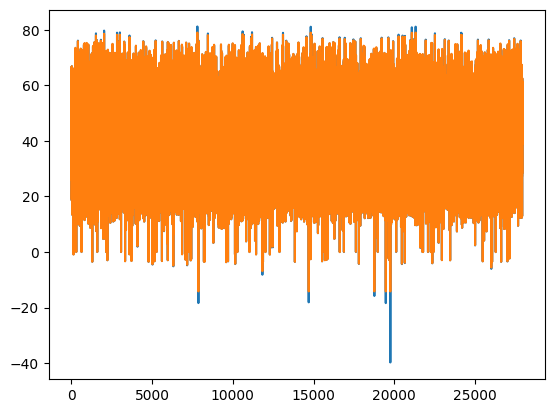

In [119]:
solucion = model1.predict(X_scaledTr)
import matplotlib.pyplot as plt
x=[i for i in range(1,len(X_train)+1)]
# Graficar los datos originales
plt.plot(x, X_train['Consumo'])

# Graficar la solución
plt.plot(x, solucion)
# Mostrar el gráfico
plt.show()